In [1]:
# Project Name: Customer Segmention
# Algorith Use: K-Mena Clustering, hierarchical

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 8)
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# checking null value
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
# decribe df
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# renaming the column name
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

In [8]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


EDA

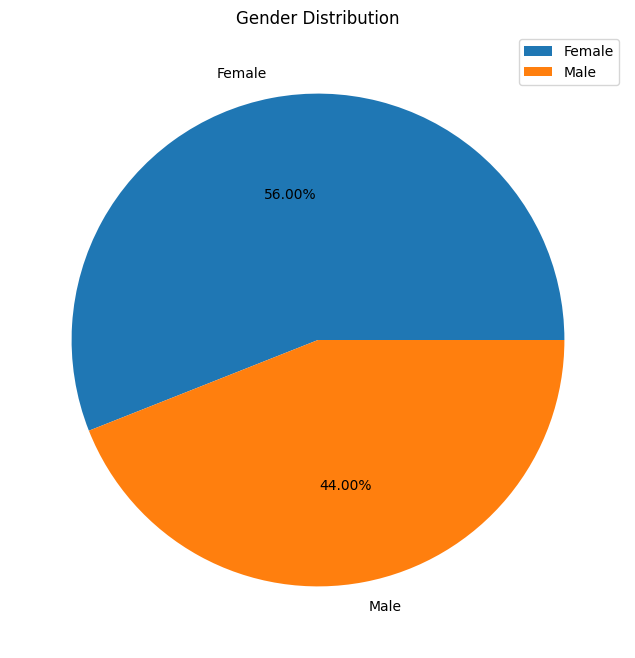

In [9]:
# gender distributin
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].value_counts().index,autopct='%1.2f%%')
plt.legend()
plt.title("Gender Distribution")
plt.show()

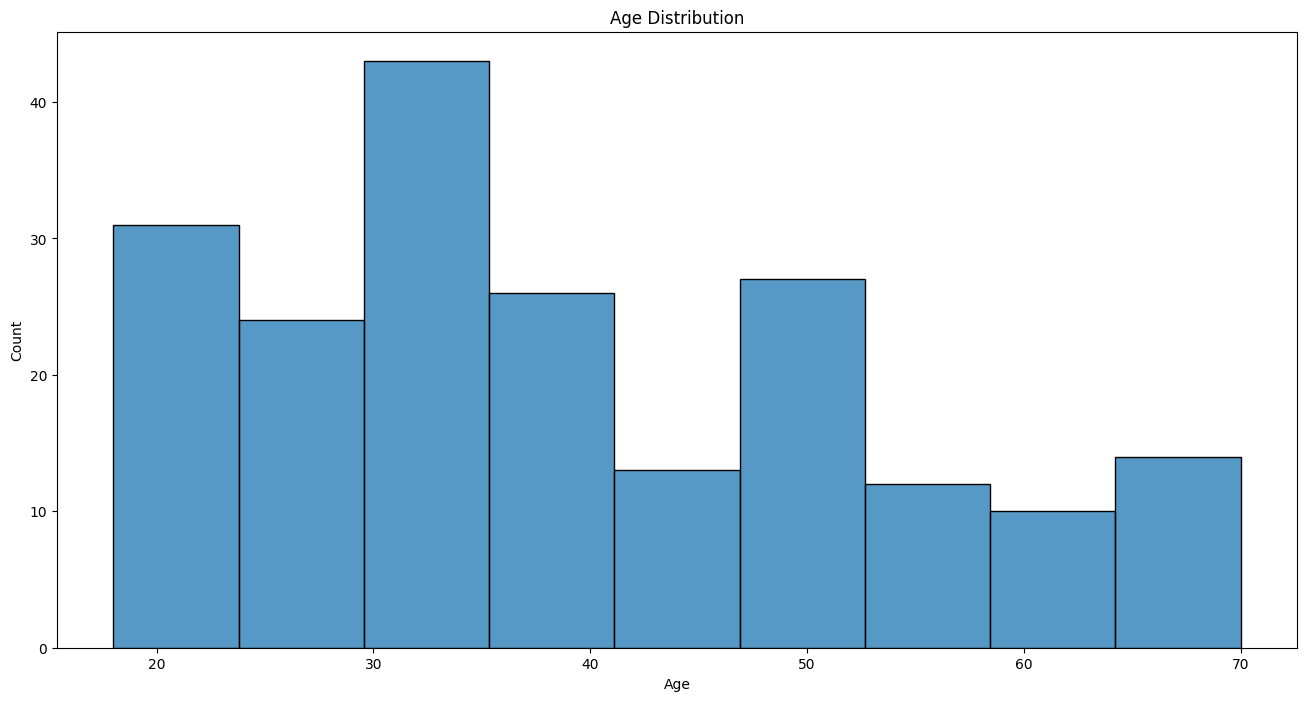

In [10]:
# age distribution
sns.histplot(df['Age'])
plt.title("Age Distribution")
plt.show()

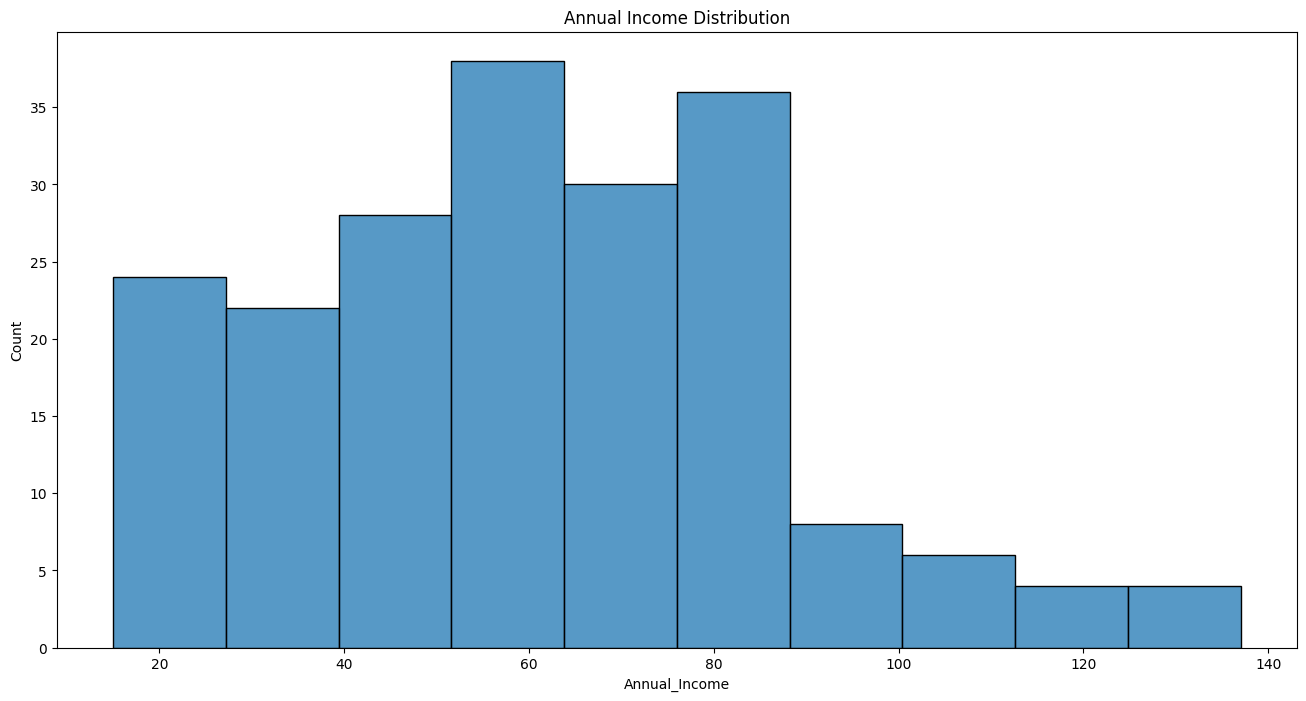

In [11]:
# annual income distribution
sns.histplot(df['Annual_Income'])
plt.title("Annual Income Distribution")
plt.show()

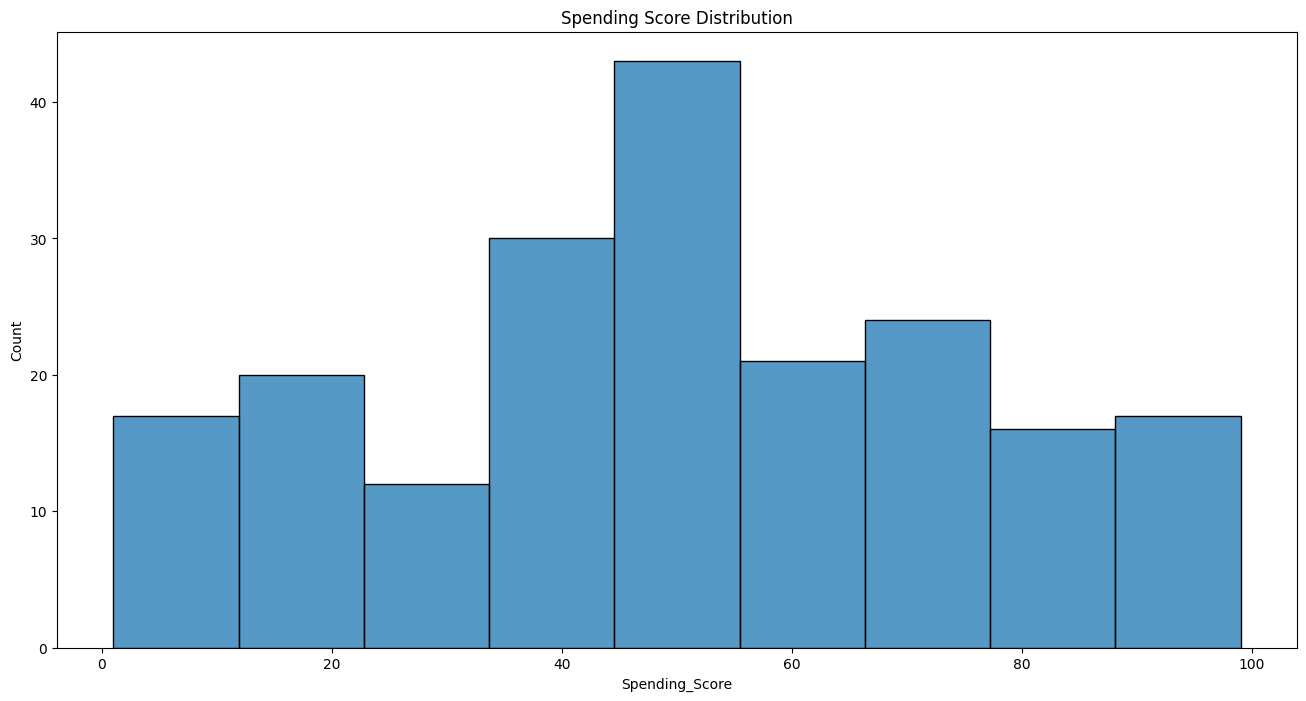

In [12]:
# spending score distribution
sns.histplot(df['Spending_Score'])
plt.title("Spending Score Distribution")
plt.show()

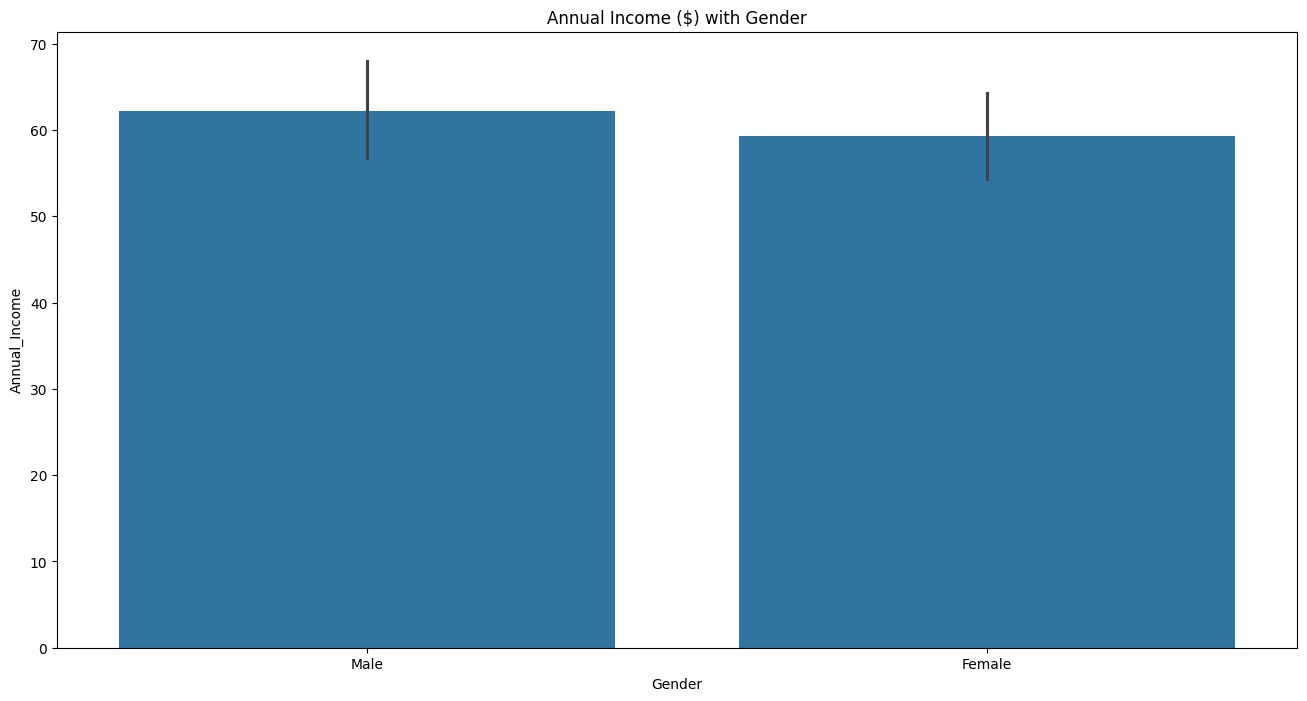

In [13]:
# plot for annual income with gender
sns.barplot(x='Gender',y='Annual_Income',data=df)
plt.title("Annual Income ($) with Gender")
plt.show()

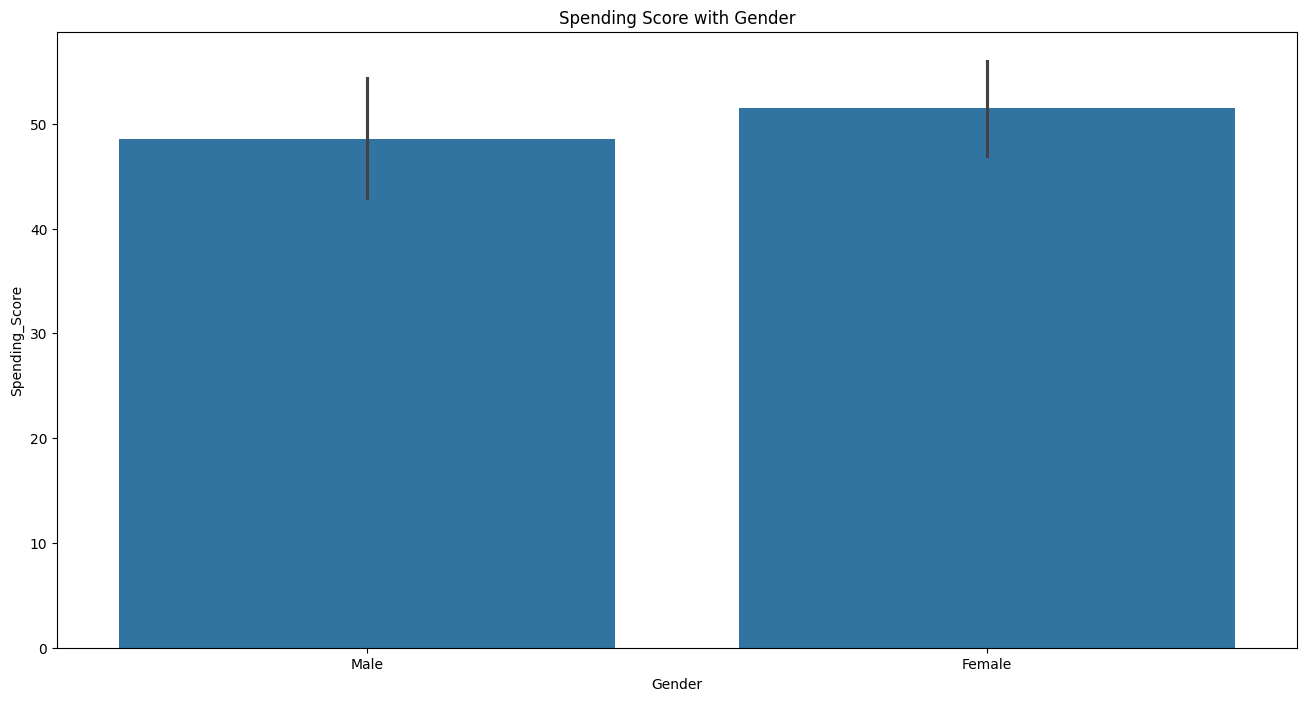

In [14]:
# plot for spending score by gender
sns.barplot(x='Gender', y='Spending_Score', data=df)
plt.title("Spending Score with Gender")
plt.show()

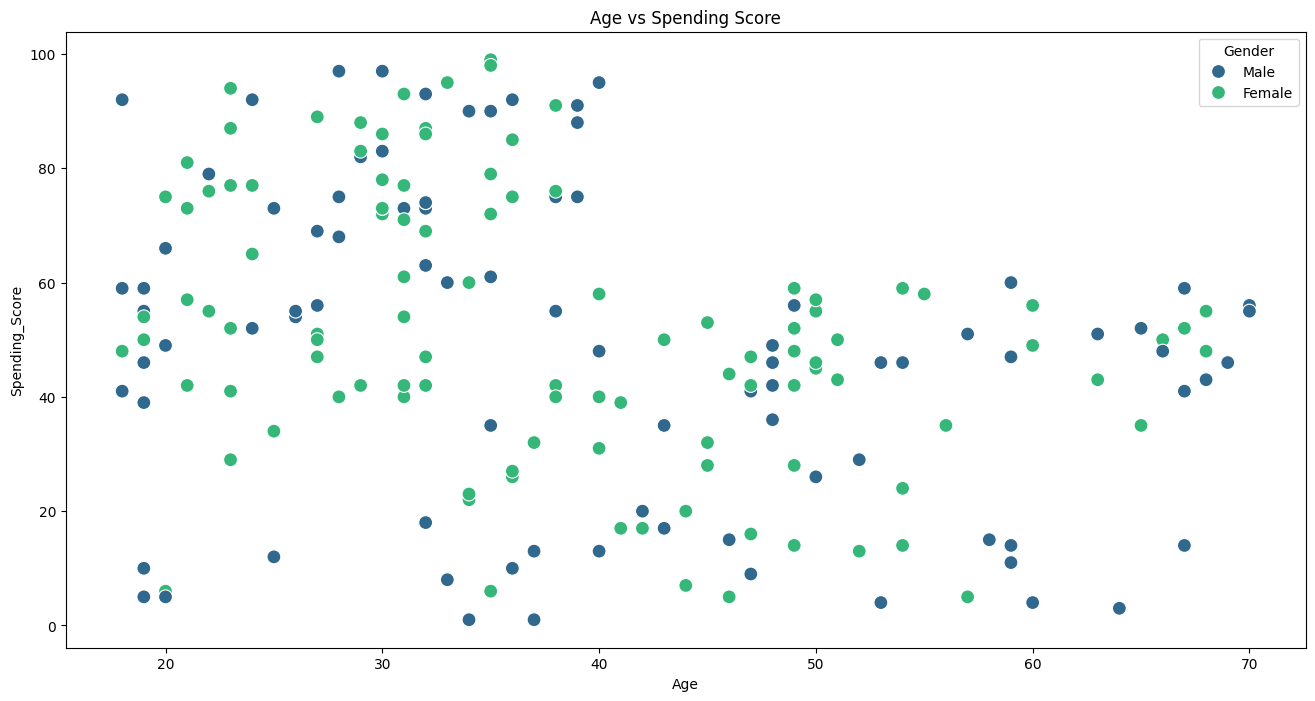

In [15]:
# Age vs Spending Score
sns.scatterplot(x='Age', y='Spending_Score', data=df, hue='Gender', palette='viridis', s=100)
plt.title("Age vs Spending Score")
plt.show()

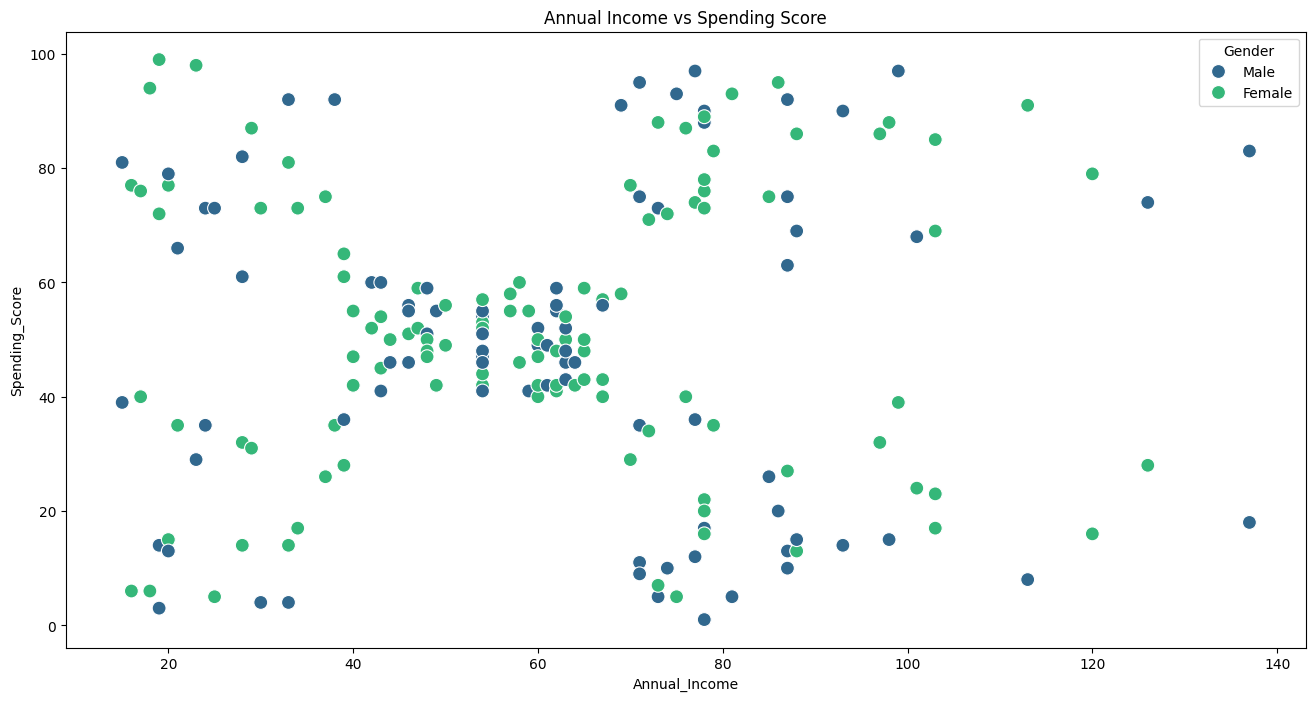

In [16]:
# annual income vs spending score
sns.scatterplot(x='Annual_Income', y='Spending_Score', data=df, hue='Gender', s=100, palette='viridis')
plt.title("Annual Income vs Spending Score")
plt.show()

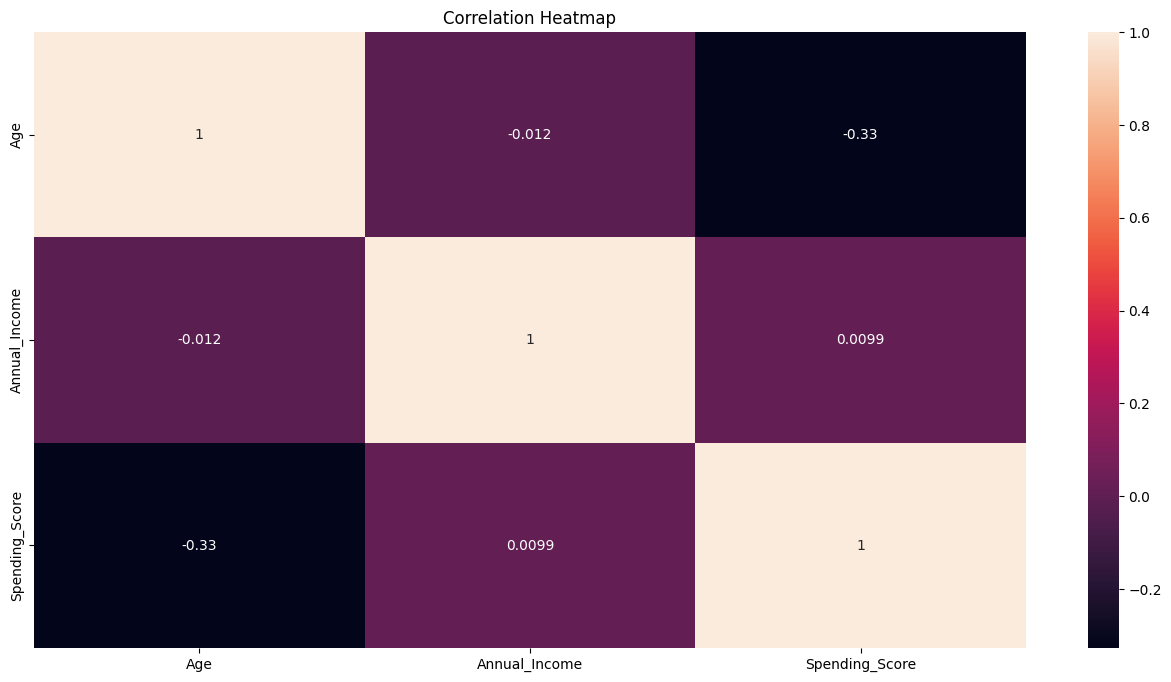

In [17]:
# heatmap
sns.heatmap(df[['Age', 'Annual_Income', 'Spending_Score']].corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

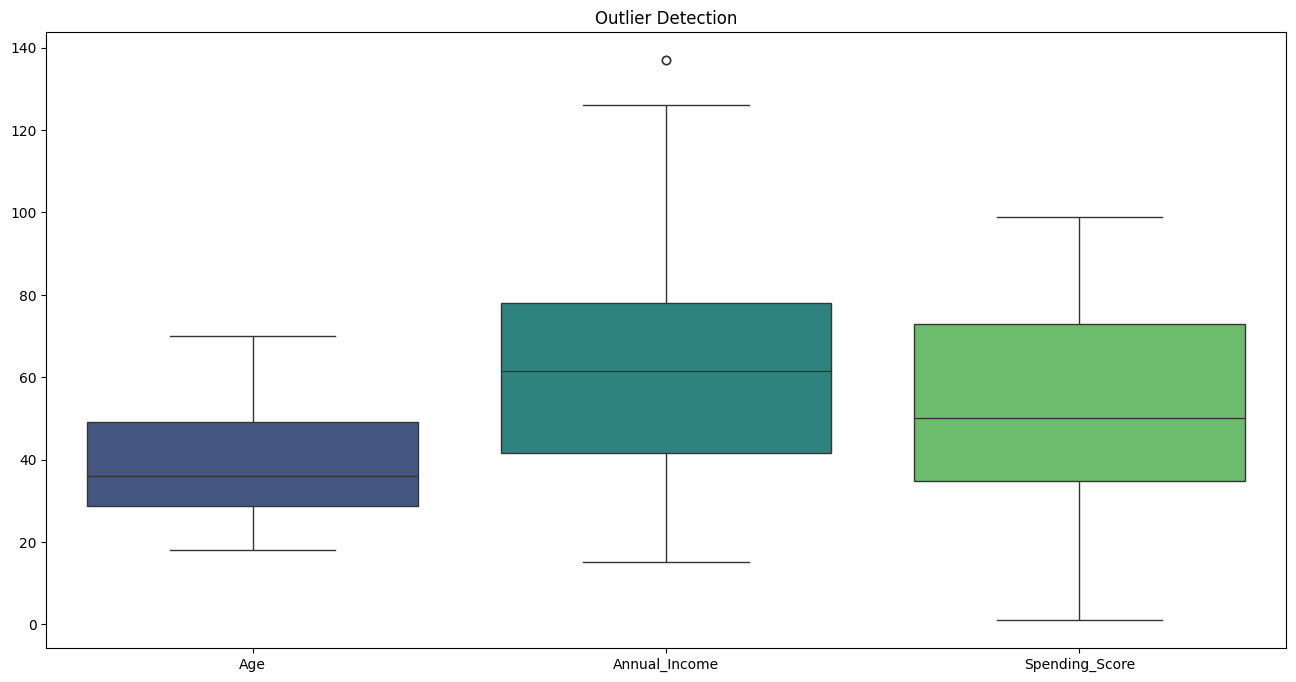

In [18]:
# Boxplot for outliers
sns.boxplot(data=df[['Age', 'Annual_Income', 'Spending_Score']], palette='viridis')
plt.title("Outlier Detection")
plt.show()

In [19]:
df[df['Annual_Income'] > 136]

,CustomerID,Gender,Age,Annual_Income,Spending_Score
198,199,Male,32,137,18
199,200,Male,30,137,83


In [20]:
# remove that rows where annual income is greater than 136
df = df[df['Annual_Income'] < 136]

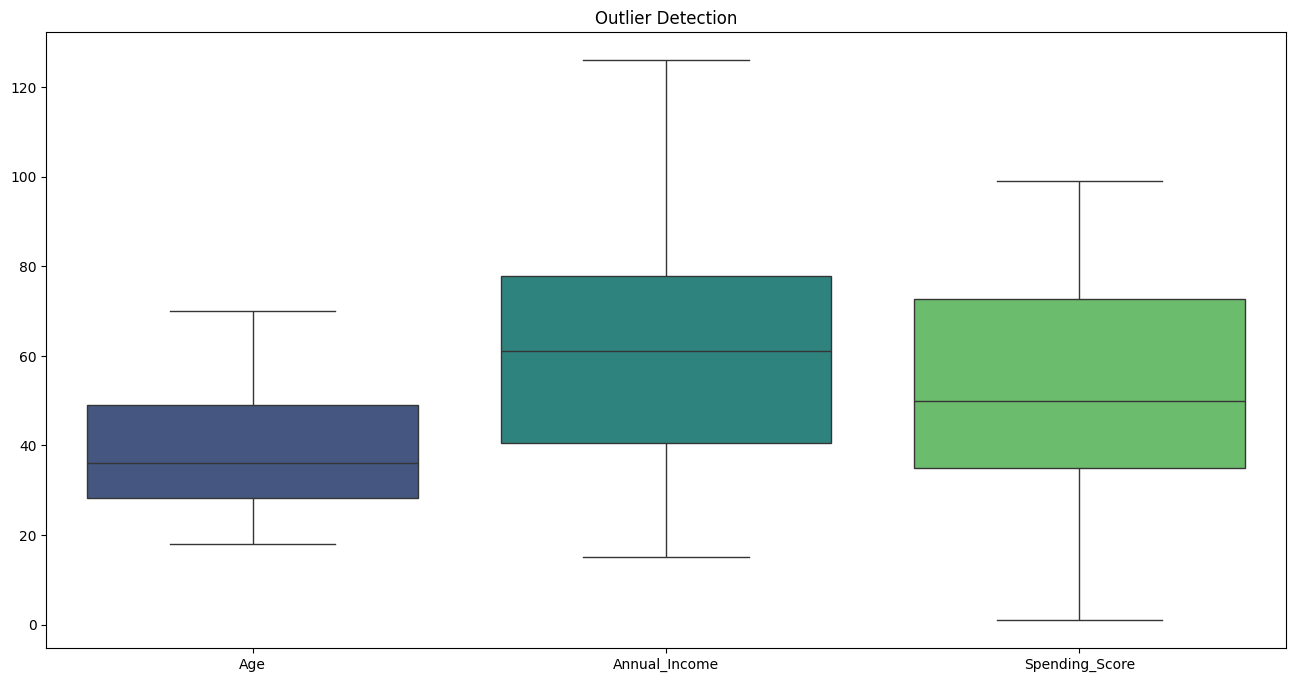

In [21]:
# Boxplot for outliers
sns.boxplot(data=df[['Age', 'Annual_Income', 'Spending_Score']], palette='viridis')
plt.title("Outlier Detection")
plt.show()

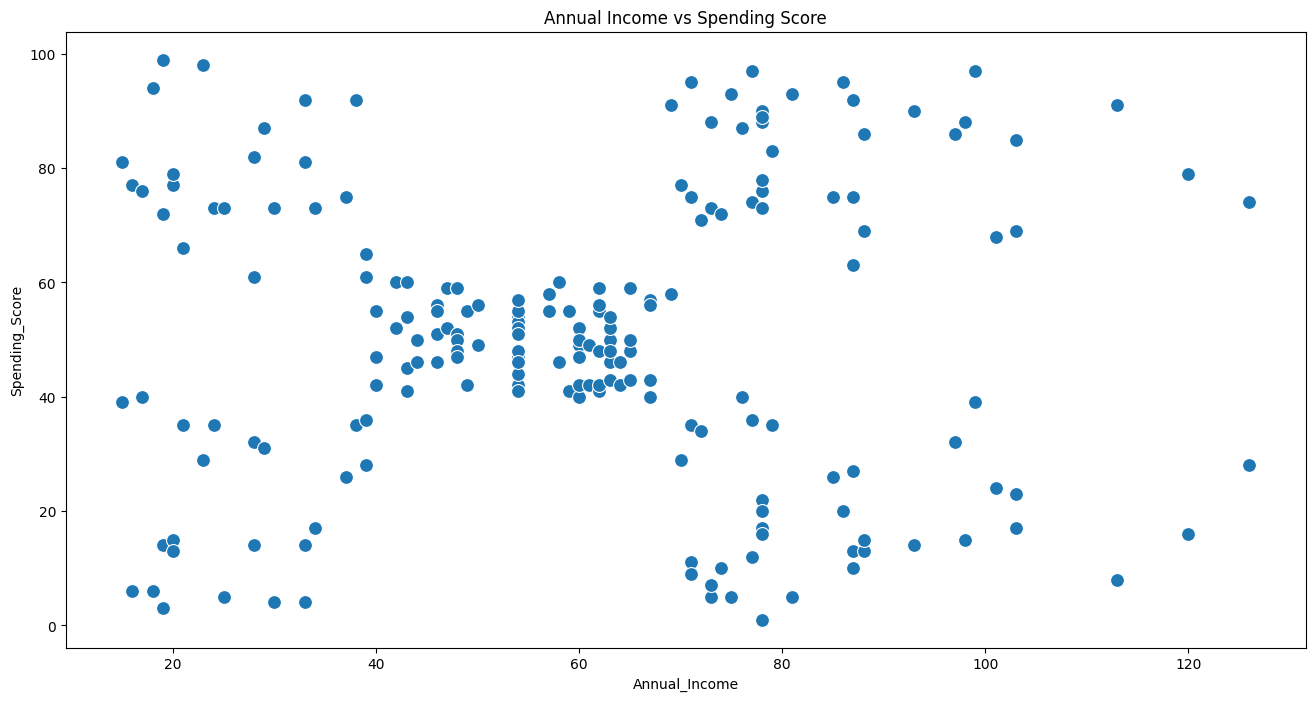

In [34]:
# scatter plot annual income vs spending score
sns.scatterplot(x='Annual_Income', y='Spending_Score', data=df, s=100)
plt.title("Annual Income vs Spending Score")
plt.show()

Machine Learning Part

In [22]:
df

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


In [23]:
X = df[['Annual_Income', 'Spending_Score']].values

In [32]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

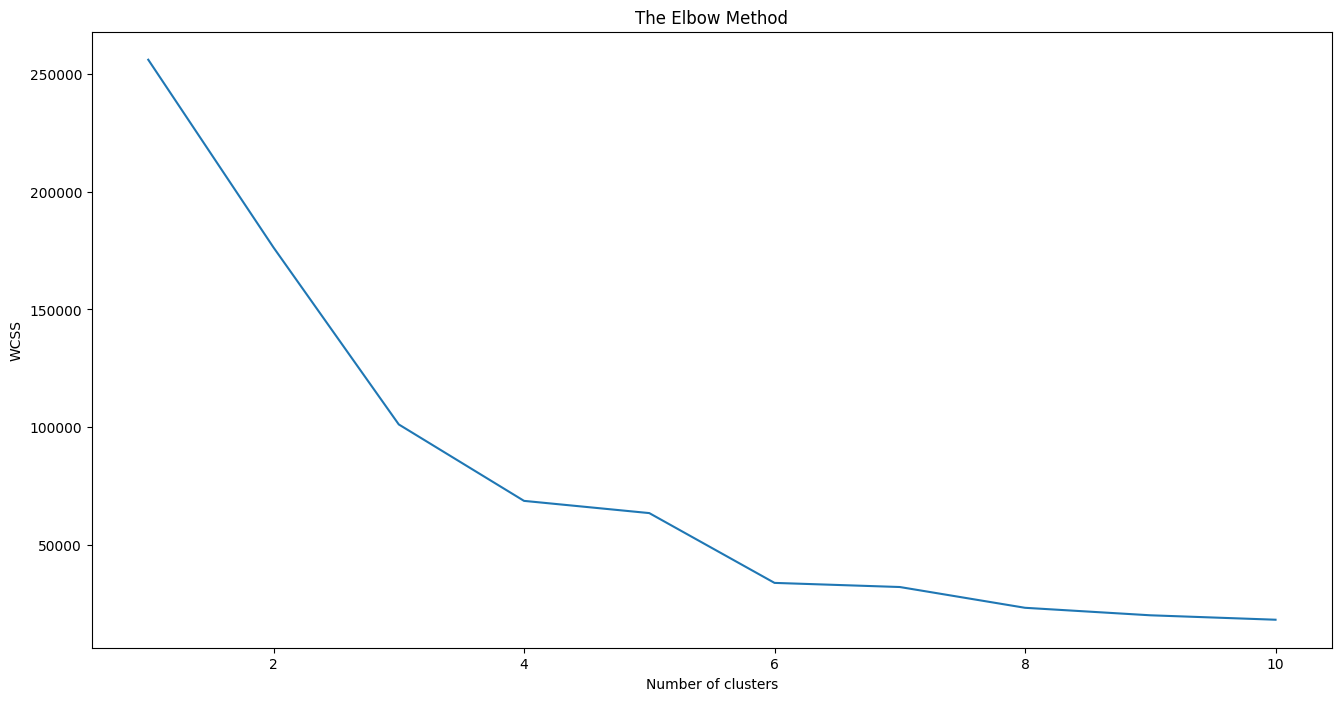

In [25]:
# finding wcss
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# showing the elbow plot
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
# training the kmeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [27]:
y_kmeans

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1],
      dtype=int32)

In [28]:
len(y_kmeans)

198

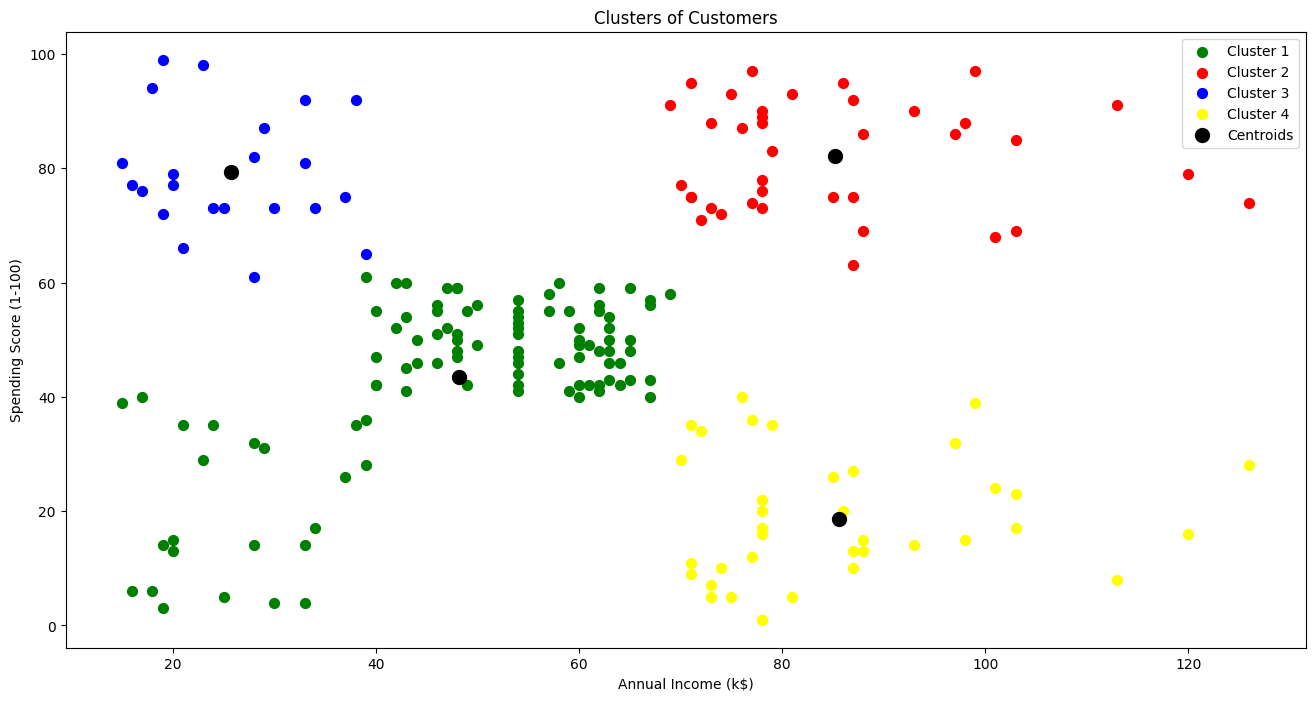

In [31]:
# ploting all clusters and their centeroid
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=50, c='blue', label='Cluster 3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=50, c='yellow', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

using hierarichal clustering

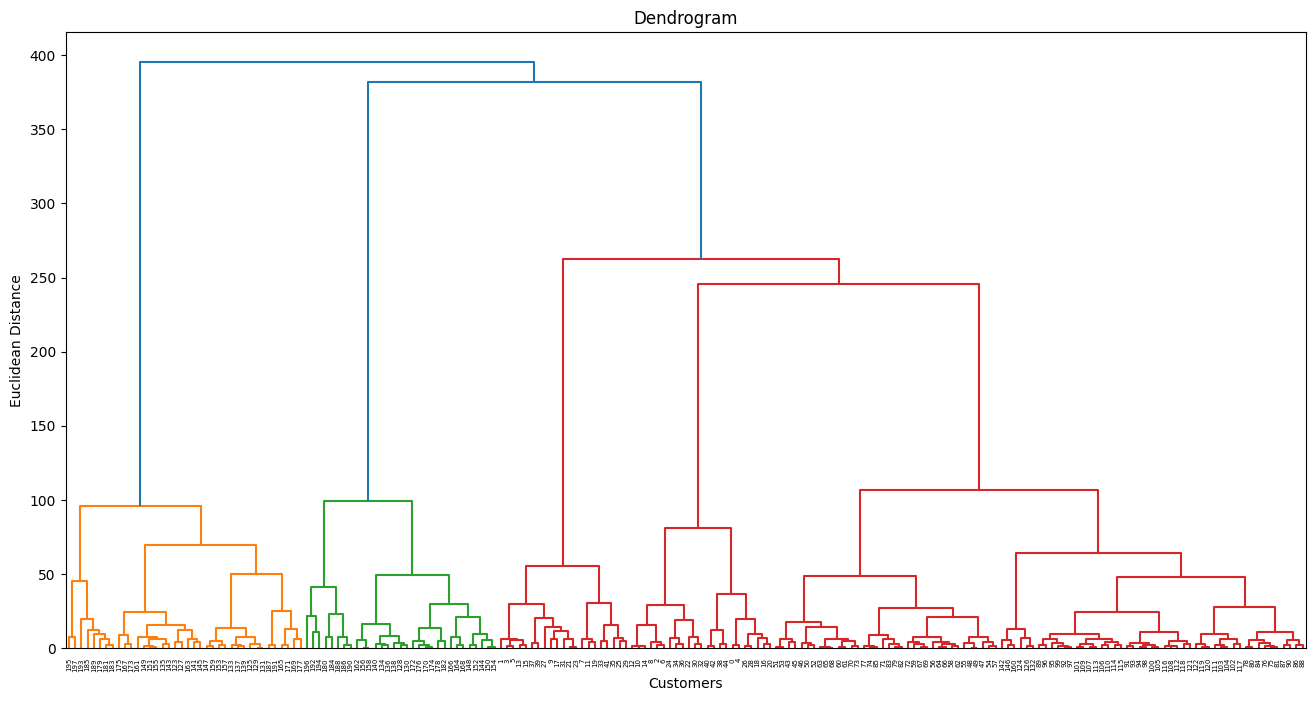

In [47]:
# dendogram
dendogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [43]:
# hierarchical algorithm
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_hc = hc.fit_predict(X)

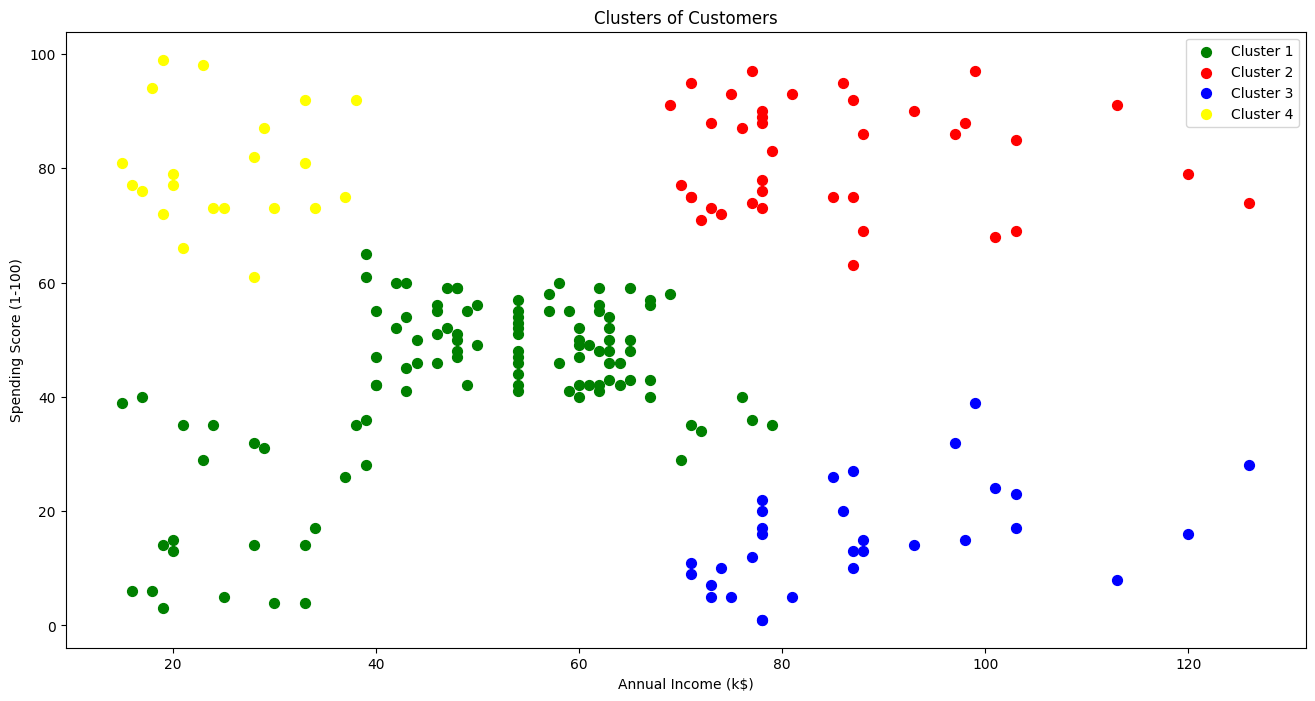

In [49]:
# plot group
plt.scatter(X[y_hc==0,0], X[y_hc==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[y_hc==1,0], X[y_hc==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[y_hc==2,0], X[y_hc==2,1], s=50, c='blue', label='Cluster 3')
plt.scatter(X[y_hc==3,0], X[y_hc==3,1], s=50, c='yellow', label='Cluster 4')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()